### EE 421/521 Image Processing - Spring 2021-22

## Subject 3 - Two-Dimensional Filtering

In this demonstration of the lecture, you will learn how to implement the following:

1. Implementation of 1D and 2D convolution
2. Mean and Gaussian low-pass filters
3. A high-pass filter

*Copyright (c) 2020-2022 by Arif Tanju Erdem*

In [21]:
# STEP 0 Import the necessary packages

# array operations
import numpy as np

# reading/writing image files
from skimage import io
from skimage import color

# displaying images and plots
import matplotlib.pyplot as plt

# histogram calculation
from skimage import exposure

# signal processing operations
from scipy import signal
from scipy.linalg import circulant

### Implementation of Convolution

\begin{equation}
y(n) = \sum_{m}x(m)h(n-m)
\end{equation}

In [22]:
# STEP 1 1-D Convolution

# demonstration of 1-D convolution with an example
#
# n =    0 1 2 3
# x(n) = 2 1 3 1
# h(n) = 1 2
#
# m:         0 1 2 3     <- input indices
# -------------------------
# x(m):      2 1 3 1     <- input
# -------------------------
# h(0-m):  2 1           <- flipped kernel
# h(1-m):    2 1
# h(2-m):      2 1
# h(3-m):        2 1
# h(4-m):          2 1
# -------------------------
# y(n):      2 5 5 7 2   <- output
# -------------------------
# n:         0 1 2 3 4   <- output indices

In [23]:
# my function to calculate 1-D convolution

def my_filter1D(x, h):
    
    # make sure both x and h are 1-D
    assert( x.ndim == 1)
    assert( h.ndim == 1)

    # get the size of x and h
    x_size = x.size
    h_size = h.size
    
    # calculate the size of y (assume "full" convolution)
    y_size = x_size + h_size - 1
    
    # create an empty output array
    y = np.zeros((y_size,))

    # go over output locations
    for n in range(y_size):
        
        # go over input locations
        for m in range(x_size):
            
            # make sure kernel is within bounds
            if n-m >= h_size: continue
            elif n-m < 0: break
                
            # calculate the convolution sum
            y[n] += x[m] * h[n-m]
    
    return y

# end of function

In [24]:
# STEP 1.1 1-D convolution: via my convolution function

# input
x = np.array([2, 1, 3, 1])

# filter kernel
h = np.array([1, 2])

# output
y = my_filter1D(x, h)

print("input:   ", x)
print("filter:  ", h)
print("output:  ", y)

input:    [2 1 3 1]
filter:   [1 2]
output:   [2. 5. 5. 7. 2.]


In [25]:
# STEP 1.2 1-D convolution: via Python convolution function

# input
x = np.array([2, 1, 3, 1])

# filter kernel
h = np.array([1, 2])

# output
y_f = np.convolve(x, h, 'full')
y_s = np.convolve(x, h, 'same')
y_v = np.convolve(x, h, 'valid')

print("full:  ", y_f)
print("same:  ", y_s)
print("valid: ", y_v)

full:   [2 5 5 7 2]
same:   [2 5 5 7]
valid:  [5 5 7]


In [26]:
# STEP 1.3 1-D convolution: via matrix multiplication

# 1-D input
x = np.array([2, 1, 3, 1])

# 1-D filter kernel
h = np.array([1, 2])

# get the size of x and h
x_size = x.size
h_size = h.size

# calculate the size of y (for "full" convolution)
y_size = x_size + h_size - 1

# append both input and kernel with zeros so that both have the same size as y
x.resize(y_size)
h.resize(y_size)

# create a circulant matrix from the filter kernel
H = circulant(h)

# calculate the convolution via matrix multiplication
# H: circulant matrix representing filter kernel
# x: input 1-D signal
# y: output 1-D signal
y = np.dot(H,x)

print("Circulant convolution matrix: \n", H)
print("Input:  ", x)
print("Output: ", y)

Circulant convolution matrix: 
 [[1 0 0 0 2]
 [2 1 0 0 0]
 [0 2 1 0 0]
 [0 0 2 1 0]
 [0 0 0 2 1]]
Input:   [2 1 3 1 0]
Output:  [2 5 5 7 2]


In [27]:
# STEP 2.1 2-D Convolution via matrix multiplication: separable case

# 2-D input
X = np.array([[2, 1, 2, 3, 0],
              [1, 3, 2, 1, 1],
              [2, 3, 0, 1, 2],
              [0, 1, 3, 2, 1]])

# 2-D filter kernel horizontal component
h_x = np.array([1, 2, -1])
# 2-D filter kernel vertical component
h_y = np.array([2, 1])

# get the size of X
X_size_x = X.shape[1]
X_size_y = X.shape[0]

# append horizontal component with zeros so that it has the same size as the width of X
h_x.resize(X_size_x)
print("reshaped h_x",h_x)
# append vertical component with zeros so that it has the same size as the height of X
h_y.resize(X_size_y)
print("reshaped h_y",h_y)

# create circulant matrices from the horizontal and vertical kernel conponents
H_x = circulant(h_x)
H_y = circulant(h_y)

# 2-D convolution calculation as implemented as matrix multiplication
# first part filters the columns with vertical kernel, second part filters the rows with horizontal kernel
Y = np.dot(np.dot(H_y.transpose(),X), H_x)

print("width = {}, height = {}".format(X_size_x, X_size_y))
print("\nX: \n", X)
print("\nH_x: \n", H_x)
print("\nH_y: \n", H_y)
print("\nY: \n", Y)

reshaped h_x [ 1  2 -1  0  0]
reshaped h_y [2 1 0 0]
width = 5, height = 4

X: 
 [[2 1 2 3 0]
 [1 3 2 1 1]
 [2 3 0 1 2]
 [0 1 3 2 1]]

H_x: 
 [[ 1  0  0 -1  2]
 [ 2  1  0  0 -1]
 [-1  2  1  0  0]
 [ 0 -1  2  1  0]
 [ 0  0 -1  2  1]]

H_y: 
 [[2 0 0 1]
 [1 2 0 0]
 [0 1 2 0]
 [0 0 1 2]]

Y: 
 [[ 9 10 19  4  6]
 [18 14  6  7  3]
 [15  9  6 10  6]
 [ 0 12 20  9  3]]


In [28]:
# STEP 2.2 2-D convolution via Python convolution function

# 2-D input
X = np.array([[2, 1, 2, 3, 0],
              [1, 3, 2, 1, 1],
              [2, 3, 0, 1, 2],
              [0, 1, 3, 2, 1]])

# 2-D filter kernel horizontal component
h_x = np.array([1, 2, -1])
# 2-D filter kernel vertical component
h_y = np.array([2, 1])

# get the size of X
X_size_x = X.shape[1]
X_size_y = X.shape[0]

# append horizontal component with zeros so that it has the same size as the width of X
h_x.resize(X_size_x)
# append vertical component with zeros so that it has the same size as the height of X
h_y.resize(X_size_y)

# calculate 2-D filter kernel as the outer product of horizontal and vertical 1-D kernels
H = np.outer(h_y, h_x)

# use SciPy function for calculating 2D convolution
# wrap mode (circulat convolution) gives the same result as above
signal.convolve2d(X, H, mode='same', boundary='wrap')

print("H: \n", H)
print("\nY: \n", Y)

H: 
 [[ 2  4 -2  0  0]
 [ 1  2 -1  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]

Y: 
 [[ 9 10 19  4  6]
 [18 14  6  7  3]
 [15  9  6 10  6]
 [ 0 12 20  9  3]]


### 2D Filtering of Images


In [29]:
# function to round image data to nearest integer, truncate to range [0, 255], set data type to uint8

def my_imgTruncate(img):
    
    img = np.round(img, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')
    
    return img

In [30]:
# my function to convert to lumincance, round to nearest integer, 
# truncate to range [0, 255], and then set data

def my_imgLuminance(imgRGB):
    
    # make sure it is a color image
    dim_img = imgRGB.shape[2]    
    assert dim_img >= 3
    
    # get the luminance data
    if dim_img == 3:
        imgLum = color.rgb2gray(imgRGB)
    else:
        # ignore the alpha channel
        imgLum = color.rgb2gray(imgRGB[:,:,0:3])

    imgLum = np.round(imgLum * 255, 0)
    imgLum = np.minimum(imgLum, 255)
    imgLum = np.maximum(imgLum, 0)
    imgLum = imgLum.astype('uint8')
    
    return imgLum

# end of function

Image width is 512 and image height is 512.
Number of color bands is 3.
Image data type is uint8.



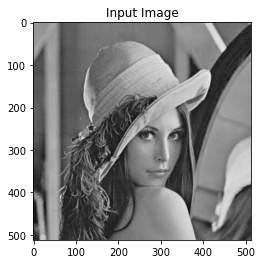

In [31]:
# STEP 3 Pick an image for filtering

# set image folder
image_folder = r'C:\Users\Metin\Desktop\EE421\Week3'

# read input image 
image_file = r'/lena.png'
image_path = image_folder + image_file
imgRGB = io.imread(image_path)

height = imgRGB.shape[0]
width = imgRGB.shape[1]
bands = imgRGB.shape[2]
datatype = imgRGB.dtype

print("Image width is {} and image height is {}.".format(width, height))
print("Number of color bands is {}.".format(bands))
print("Image data type is {}.\n".format(datatype))

# calculate the luminance image
img_input = my_imgLuminance(imgRGB)

# display luminance image
plt.imshow(img_input, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
#plt.xticks([]), plt.yticks([])
plt.show()

2D mean filter:
 [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


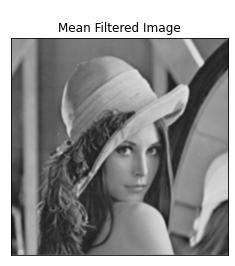

In [32]:
# STEP 4.1 Implement a mean filter

# set filter coefficients
size = 5
my_filter = np.ones((size, size))
my_filter /= my_filter.sum()

# print 2D filter coefficients
print("2D mean filter:\n", my_filter)

# 2D convolution
img_output_mean = signal.convolve2d(img_input, my_filter, mode='same', boundary='fill', fillvalue=128)

# round to nearest integer
img_output_mean = my_imgTruncate(img_output_mean)

# display the filtered image
plt.imshow(img_output_mean, cmap='gray', vmin=0, vmax=255)
plt.title('\nMean Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()

M = 5, sigma = 2.125, size = 13

1D Gaussian filter:
 [0.00349352 0.01180947 0.03199059 0.06944454 0.12080307 0.16839992
 0.18811778 0.16839992 0.12080307 0.06944454 0.03199059 0.01180947
 0.00349352]


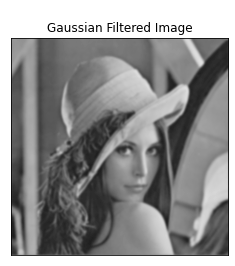

In [33]:
# STEP 4.2 Implement a Gaussian filter

# filtering factor
M = 5

# standard deviation of Gaussian
sigma = 0.425 * M

# filter size
size = np.round(2.55 * M, 0)
size = size.astype(int)

# for symmetric filter size should be odd
if size%2 == 0:
    size -= 1

# print filter parameters
print("M = {}, sigma = {}, size = {}\n".format(M, sigma, size))

# calculate Gaussian with the selected parameters
my_filter = signal.gaussian(size, sigma, sym=True)
# normalize sum to 1
my_filter /= my_filter.sum()

# print 1D filter coefficients
print("1D Gaussian filter:\n", my_filter)

# obtain the separable 2D filter from the 1D filter
my_filter2D = np.outer(my_filter, my_filter)

# filter the input image with the Gaussian filter
img_output_Gauss = signal.convolve2d(img_input, my_filter2D, mode='same', boundary='fill', fillvalue=128)

# round output data to nearest integer
img_output_Gauss = my_imgTruncate(img_output_Gauss)

# display the filtered image
plt.imshow(img_output_Gauss, cmap='gray', vmin=0, vmax=255)
plt.title('\nGaussian Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()


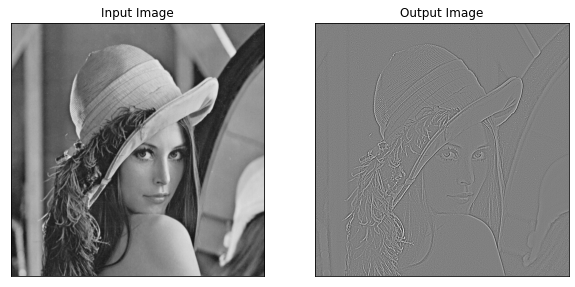

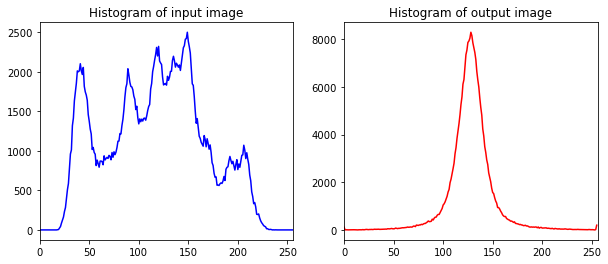

In [34]:
# STEP 5 Implement a high-pass filter

# set filter coefficients
my_filter = np.array(\
    [[ 0,    -0.25,  0   ],
    [ -0.25,  1,    -0.25],
    [  0,    -0.25,  0   ]])

# 2D convolution
img_output = signal.convolve2d(img_input, my_filter, mode='same', boundary='symm')

# round to nearest integer and set data type to integer
# multiply by 4 and add 128 for display purposes
img_output = my_imgTruncate(img_output * 4 + 128)

# display original and filtered images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_input, cmap = 'gray', vmin=0, vmax=255)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_output, cmap = 'gray', vmin=0, vmax=255)
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

# calculate input and output histograms
hist_input, bins = exposure.histogram(img_input, source_range='dtype')
hist_output, bins = exposure.histogram(img_output, source_range='dtype')

# histrogram plots
plt.figure(figsize=(10,4))
plt.subplot(121), plt.plot(hist_input, color = 'b')
plt.xlim([0,256])
plt.title('Histogram of input image')
plt.subplot(122), plt.plot(hist_output, color = 'r')
plt.xlim([0,256])
plt.title('Histogram of output image')
plt.show()
plt.close()